In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1. Flipping and Cropping Image

Pada poin ini penulis mencoba memutar/flip dan memotong image dengan menggunakan library cv2, keterangan tiap kode dapat dilihat pada masing-masing *comment*.

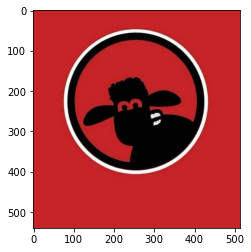

In [2]:
# Membaca/mengimport file gambar
img2 = cv2.imread("shaun.jpg")
img2 = img2[:, :, ::-1]

# Menampilkan gambar
plt.imshow(img2)
plt.show()

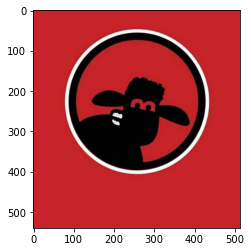

In [3]:
# Flip gambar secara horizontal
flipped_img = cv2.flip(img2, 1)

# Menampilkan gambar
plt.imshow(flipped_img)
plt.show()

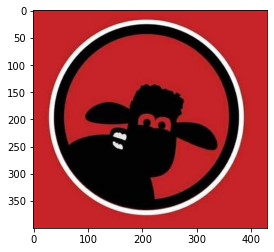

In [4]:
# Crop gambar
cropped_image = flipped_img[30:430, 50:480]

# Menampilkan gambar
plt.imshow(cropped_image)
plt.show()

## 2. Pixelation

Pada poin ini penulis mencoba mengubah gambar original menjadi gambar yang terpikselasi dengan me-resize gambar original dan menentukan jumlah piksel menjadi lebih kecil.

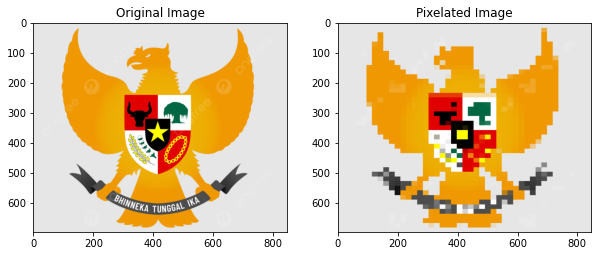

In [18]:
# Membaca/mengimport file gambar
img = cv2.imread("garuda.png")
img = img[:, :, ::-1]

# Mendapatkan ukuran awal gambar
height, width = img.shape[:2]

# Menentukan ukuran gambar pikselasi
w, h = (45, 45)

# Resize gambar ke ukuran pikselasi 
temp = cv2.resize(img, (w, h), interpolation=cv2.INTER_LINEAR)

# Membuat output gambar yang telah dipikselasi
pixelated_img = cv2.resize(temp, (width, height), interpolation=cv2.INTER_NEAREST)

# Membuat gambar dengan dua subplot
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# Menunjukkan gambar original di subplot pertama
axs.flatten()[0].imshow(img)
axs.flatten()[0].set_title('Original Image')

# Menunjukkan gambar yang telah diproses di subplot kedua
axs.flatten()[1].imshow(pixelated_img)
axs.flatten()[1].set_title('Pixelated Image')

plt.show()

## 3. Invert Image Colors

Pada poin ini penulis mencoba meng-invert warna pada gambar. Awalnya ada gambar mural dengan konsep negative color space, lalu penulis menginvert warna pada gambar tersebut sehingga terlihat lukisan dengan warna yang dimaksud.

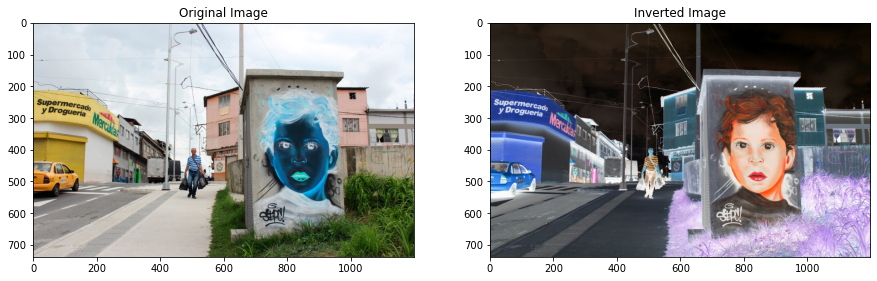

In [6]:
# Membaca/mengimport file gambar
img4 = cv2.imread("negative2.jpeg")
img4 = img4[:, :, ::-1]

# Invert warna pada gambar
inverted_image = cv2.bitwise_not(img4)

# Membuat gambar dengan dua subplot
fig, axs = plt.subplots(1, 2, figsize=(15,7))

# Menunjukkan gambar original di subplot pertama
axs.flatten()[0].imshow(img4)
axs.flatten()[0].set_title('Original Image')

# Menunjukkan gambar yang telah diproses di subplot kedua
axs.flatten()[1].imshow(inverted_image)
axs.flatten()[1].set_title('Inverted Image')

plt.show()

## 4. Contrast Adjustment

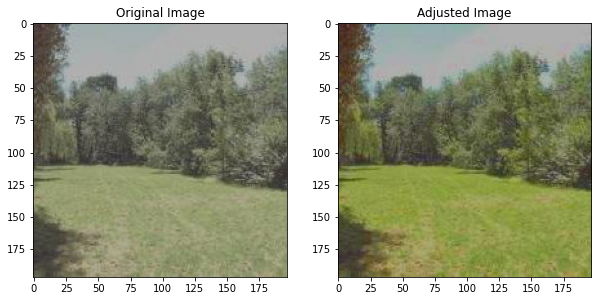

In [7]:
# Membaca/mengimport file gambar
img5 = cv2.imread("green.png")
img5 = img5[:, :, ::-1]

# Convert color space gambar dari BGR ke HSV
hsv = cv2.cvtColor(img5, cv2.COLOR_BGR2HSV)

# Meningkatkan saturasi gambar
saturation_factor = 2
hsv[:, :, 1] = np.clip(hsv[:, :, 1] * saturation_factor, 0, 255)

# Convert color space gambar dari HSV ke BGR kembali
adjusted_img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Membuat gambar dengan dua subplot
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# Menunjukkan gambar original di subplot pertama
axs.flatten()[0].imshow(img5)
axs.flatten()[0].set_title('Original Image')

# Menunjukkan gambar yang telah diproses di subplot kedua
axs.flatten()[1].imshow(adjusted_img)
axs.flatten()[1].set_title('Adjusted Image')

plt.show()

## 5. Detect and Blur Face in Image

Pada poin ini penulis mencoba mendeteksi muka yang terdapat pada gambar menggunakan Haar-Cascade Classifier lalu muka yang terdeteksi tadi diblur dengan menggunakan Gaussian Blur.

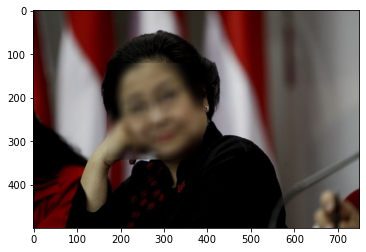

In [21]:
# Membaca/mengimport file gambar
img3 = cv2.imread("face.png")
img3 = img3[:, :, ::-1]

# Membuat face detection classifier dengan Haar Cascade Clasifier
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# Convert gambar ke grayscale
gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

# Deteksi muka di gambar
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# Loop pada tiap muka dan blur muka yang terdeteksi
for (x,y,w,h) in faces:
    face = img3[y:y+h, x:x+w]
    face = cv2.GaussianBlur(face, (23, 23), 30)
    img3[y:y+face.shape[0], x:x+face.shape[1]] = face

plt.imshow(img3)
plt.show()

## 6. Circle Detection

Pada poin ini penulis mencoba mendeteksi dan menghitung lingkaran pada gambar yang berupa telur ikan. Penulis menggunakan HoughCircles untuk mendeteksi telur kemudian menghitung jumlah telur yang terdeteksi dan menuliskannya sebagi teks pada gambar.

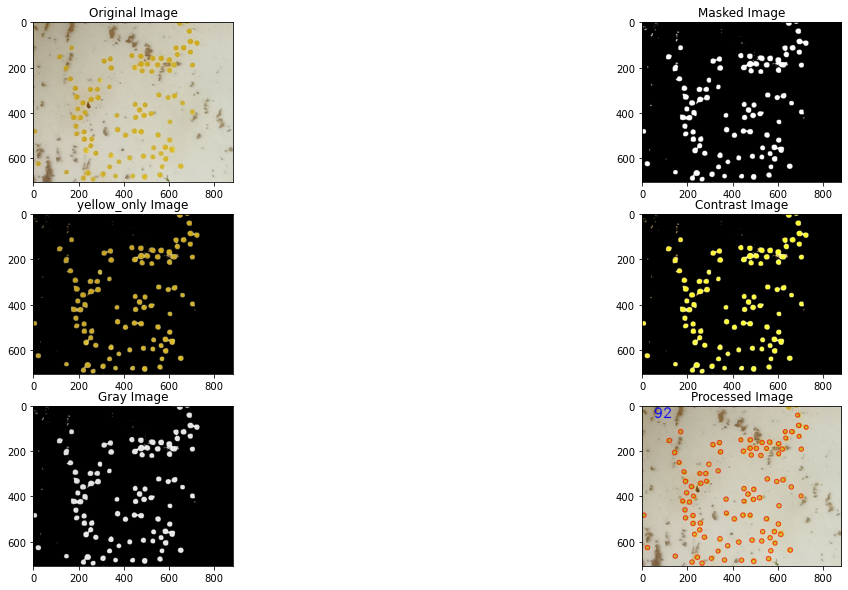

In [10]:
# Membaca/mengimport gambar
img = cv2.imread("telur.jpeg")
ori_img = cv2.imread("telur.jpeg")

# Convert color space gambar dari BGR ke HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Menentukan range lower dan upper untuk warna yellow dalam HSV
lower_yellow = (20, 100, 100)
upper_yellow = (30, 255, 255)

# Membuat mask untuk hanya memilih piksel berwarna kuning
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Meng-apply mask ke gambar original  untuk hanya memilih piksel berwarna kuning
yellow_only = cv2.bitwise_and(img, img, mask=mask)

# Meng-adjust kontras pada gambar
contrast = cv2.convertScaleAbs(yellow_only, alpha=1.5, beta=0)

# Deteksi lingkaran dengan HoughCircles
gray = cv2.cvtColor(contrast, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=7, param2=8, minRadius=8, maxRadius=11)

# Hitung jumlah lingkaran yang terdeteksi
if circles is not None:
    num_circles = len(circles[0])
else:
    print("No circles detected.")

# Gambar lingkaran di gambar awal
if circles is not None:
    circles = circles[0]
    for circle in circles:
        x, y, r = circle.astype(int)
        cv2.circle(img, (x, y), r, (0, 0, 255), 2)

# Menambahkan teks jumlah lingkaran di gambar
if circles is not None:
    cv2.putText(img, f" {num_circles}", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 3)
 
# Convert gambar dari BGR ke RGB
ori_img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
yellow_only = cv2.cvtColor(yellow_only, cv2.COLOR_BGR2RGB)
contrast = cv2.cvtColor(contrast, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)

# Membuat gambar dengan dua subplot
fig, axs = plt.subplots(3, 2, figsize=(20, 10))

# Menunjukkan gambar original di subplot pertama
axs.flatten()[0].imshow(ori_img)
axs.flatten()[0].set_title('Original Image')

# Menunjukkan gambar mask di subplot kedua
axs.flatten()[1].imshow(mask)
axs.flatten()[1].set_title('Masked Image')

# Menunjukkan gambar dengan hanya warna kuning di subplot ketiga
axs.flatten()[2].imshow(yellow_only)
axs.flatten()[2].set_title('yellow_only Image')

# Menunjukkan gambar yang telah di-adjust kontrasnya di subplot keempat
axs.flatten()[3].imshow(contrast)
axs.flatten()[3].set_title('Contrast Image')

# Menunjukkan gambar grayscale di subplot kelima
axs.flatten()[4].imshow(gray)
axs.flatten()[4].set_title('Gray Image')

# Menunjukkan gambar dengan lingkaran yang terdeteksi di subplot keenam
axs.flatten()[5].imshow(img)
axs.flatten()[5].set_title('Processed Image')

plt.show()

## 7. Detect and Blur Face from Webcam

Poin ini merupakan pengembangan dari poin 5, yaitu penulis mencoba mendeteksi muka menggunakan Haar-Cascade Classifier lalu muka yang terdeteksi tadi diblur dengan menggunakan Gaussian Blur. Namun, untuk sumber gambar sekarang adalah frame-frame video yang langsung diambil dari webcam pengguna.

In [22]:
# Membuat face detection classifier dengan Haar-Cascade Classifier
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Memuat dan memilih webcam (0/1/2/....)
cap = cv2.VideoCapture(0)

# Menentukan format video membuat VideoWriter untuk video output
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output_video.mp4', fourcc, 30, (int(cap.get(3)), int(cap.get(4))))

# Loop tiap frame pada webcam 
while True:
    # Membaca frame dari webcam
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert frame ke grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Deteksi wajah pada frame
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Loop pada tiap wajah dan blur 
    for (x,y,w,h) in faces:
        face = frame[y:y+h, x:x+w]
        face = cv2.GaussianBlur(face, (23, 23), 30)
        frame[y:y+face.shape[0], x:x+face.shape[1]] = face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Tulis output frame yang telah diolah pada video 
    out.write(frame)

    # Tampilkan frame yang telah diolah
    cv2.imshow('Blurred Frame', frame)

    # Keluar jika user memencet tombol 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Rilis output video
cap.release()
out.release()
cv2.destroyAllWindows()